# Transpose Demo Atoms

This notebook contains atomic examples showing how Transpose can be used.

Setup Block must be executed first.

In [2]:
# Setup Block

# This block must run before any other code
# It imports the key and sets the SDK up

import os
from pprint import pprint
from transpose import Transpose

# create a new API client with an API key
api = Transpose(os.environ.get('TRANSPOSE_KEY'))

# Bored Ape Yacht Club Collection
bayc_contract_address = "0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D"

# Sections
- Basics
- Low Level Data
- Wallet Analysis
- Project Analysis
- Extra SDK Examples

## Basics
- Collection Basics
	- Collection Info
	- Collection Image
	- Collection Activity
	- Collection Sales 
- NFT Basics
	- NFT Info
	- NFT Image
	- NFT Activity
	- NFT Sales
- Wallet Basics
	- Wallet Balances
	- Wallet Activity
	- Wallet Sales 

### Collection Basics
- Collection Info
- Collection Image
- Collection Activity
- Collection Sales 

In [25]:
# Collection Info

bayc = api.nft.collections_by_contract_address(bayc_contract_address)
bayc[0].to_dict()

{'contract_address': '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D',
 'name': 'BoredApeYachtClub',
 'symbol': 'BAYC',
 'description': 'The Bored Ape Yacht Club is a collection of 10,000 unique Bored Ape NFTs— unique digital collectibles living on the Ethereum blockchain. Your Bored Ape doubles as your Yacht Club membership card, and grants access to members-only benefits, the first of which is access to THE BATHROOM, a collaborative graffiti board. Future areas and perks can be unlocked by the community through roadmap activation. Visit www.BoredApeYachtClub.com for more details.',
 'created_timestamp': '2021-04-22T23:13:40Z',
 'standard': 'ERC-721',
 'count': 10000,
 'external_url': 'http://www.boredapeyachtclub.com/',
 'image_url': 'https://cdn.transpose.io/collection/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/image.png',
 'twitter_username': 'BoredApeYC',
 'telegram_url': None,
 'discord_url': 'https://discord.gg/3P5K3dzgdB',
 'is_nsfw': False,
 'opensea_slug': 'boredapeyachtclub',
 '

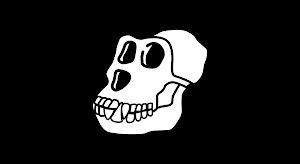

In [26]:
# Collection Image

from IPython.display import display

display(api.cdn.query(bayc[0].image_url).image())

In [52]:
# Collection Activity

# Get 100 most recent Bored Ape Collection Transfers
transfers = api.nft.transfers_by_contract_address(bayc_contract_address, limit=100, order='desc')

# Print details about transfers
print("{} transfers".format(len(transfers)))
for transfer in range(5):
    print(transfers[transfer].to_dict()['category'] + " to " + str(transfers[transfer].to_dict()['to']))

100 transfers
send to 0x28dC00FC053d756bF7D98A9F201264806b0e1b03
send to 0x1d62df39f4D20119EcEEf66bFEE23c0afe49CeB8
send to 0xb34d849c0551C6A4C0D491224BCc6114B906AfC4
send to 0xDBfD76AF2157Dc15eE4e57F3f942bB45Ba84aF24
send to 0x5f6ac80CdB9E87f3Cfa6a90E5140B9a16A361d5C


In [5]:
# Collection Sales

# Get 100 most recent Bored Ape Collection Sales
sales = api.nft.sales_by_contract_address(bayc_contract_address, limit=100, order='desc')

# Summary of data
print("Sales found:{}\n".format(len(sales)))
print("First sale: {}".format(sales[0].to_dict()['id']))
print("Last sale: {}".format(sales[-1].to_dict()['id']))

# Example Sale object
print("Example sale object: ")
pprint(sales[0].to_dict())

# Total sale value
total_eth_value = 0
total_usd_value = 0
for sale in sales:
    total_eth_value += sale.to_dict()['eth_price']
    total_usd_value += sale.to_dict()['usd_price']
print("\nTotal sale value: {} ETH, {} USD".format(total_eth_value, total_usd_value))


Sales found:100

Example sale object: 
{'block_number': 15037504,
 'buyer': '0xb34d849c0551C6A4C0D491224BCc6114B906AfC4',
 'confirmed': True,
 'contract_address': '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D',
 'contract_version': 'seaport',
 'eth_price': 115,
 'exchange_name': 'opensea',
 'is_multi_token_sale': False,
 'log_index': 149,
 'multi_token_sale_index': 0,
 'payment_token': None,
 'price': 115000000000000000000,
 'quantity': 1,
 'seller': '0x028b91C2da0EAacc4C6BA656e78D8e051a091540',
 'timestamp': '2022-06-28T02:31:56Z',
 'token_id': 3553,
 'transaction_hash': '0xcbf864de727621e060d52a81923c960f29dd5f969ab851ab8ca830df438bfcda',
 'usd_price': 134397.05}

Total sale value: 9589.230755408971 ETH, 11225607.590000002 USD


### NFT Basics
- NFT Info
- NFT Image
- NFT Activity
- NFT Sales

In [48]:
# NFT Info

# Retrieve NFT Metadata
nft = api.nft.nfts_by_token_id(bayc_contract_address, "4444")[0]
print("NFT Metadata:")
pprint(nft.to_dict())

# NFT Owner
print("\nNFT Owner:")
nft_owner = api.nft.owners_by_token_id(bayc_contract_address, "4444")[0]
pprint(nft_owner.to_dict())

NFT Metadata:
{'approved_address': None,
 'contract_address': '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D',
 'description': None,
 'external_url': None,
 'image_url': 'https://cdn.transpose.io/nft/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/4444/image.png',
 'last_refreshed': '2022-05-27T21:24:18Z',
 'media_url': None,
 'metadata_url': 'https://cdn.transpose.io/nft/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/4444/metadata.json',
 'minted_timestamp': '2021-05-01T07:35:49Z',
 'name': None,
 'properties': [{'trait_type': 'Eyes', 'value': 'X Eyes'},
                {'trait_type': 'Earring', 'value': 'Gold Stud'},
                {'trait_type': 'Mouth', 'value': 'Bored Unshaven'},
                {'trait_type': 'Background', 'value': 'Army Green'},
                {'trait_type': 'Clothes', 'value': 'Biker Vest'},
                {'trait_type': 'Fur', 'value': 'Blue'},
                {'trait_type': 'Hat', 'value': 'Fez'}],
 'supply': 1,
 'token_id': 4444}

NFT Owner:
{'balance': 1,
 'contract

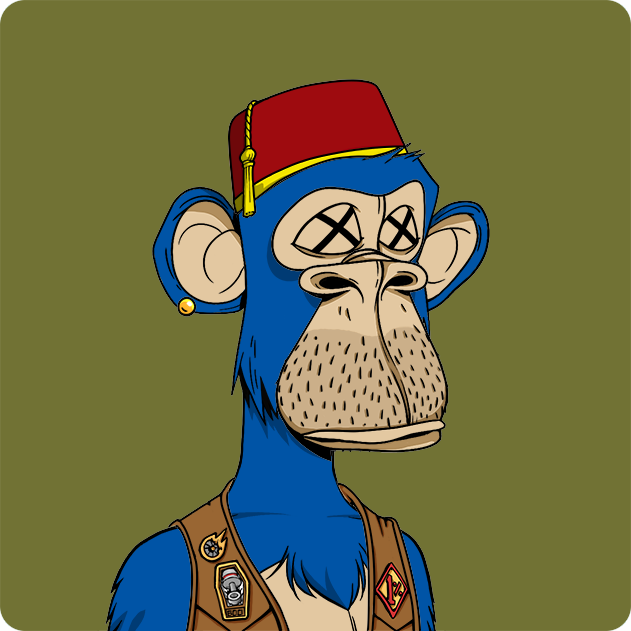

In [49]:
# NFT Image
from IPython.display import display

nft = api.nft.nfts_by_token_id(bayc_contract_address, "4444")[0]
display(api.cdn.query(nft.image_url).image())

In [42]:
# NFT Activity
transfers = api.nft.transfers_by_token_id(contract_address=bayc_contract_address, token_id="4444", limit=100, order='desc')

# Print details about transfers
print("{} transfers found for Bored Ape with token id 4444".format(len(transfers)))
print("First date: {}".format(transfers[-1].to_dict()['timestamp']))
print("Last date: {}".format(transfers[0].to_dict()['timestamp']))

# Print transaction blocks
print("\nFirst 5 transfer blocks:")
for transfer in transfers[-5:]:
    print("\t" + str(transfer.to_dict()['block_number']))
print("\t...")

# Aggregate all owners
owners = []
for transfer in transfers:
    if transfer.to_dict()['to'] not in owners:
        owners.append(transfer.to_dict()['to'])
print("\nUnique owners: {}".format(len(owners)))

# Print first 5 owners
for owner in owners[-5:]:
    print("\t" + owner[:8] + "...")
print("\t...")


23 transfers found for Bored Ape with token id 2222
First date: 2021-05-01T06:49:49Z
Last date: 2022-06-26T23:54:38Z

First 5 transfer blocks:
	14568623
	13821215
	12562081
	12561673
	12346762
	...

Unique owners: 11
	0xf6ea6d...
	0xA7Ab7a...
	0xFa898e...
	0x7C2B65...
	0x359374...
	...


In [58]:
# NFT Sales

nft_sales = api.nft.sales_by_token_id(contract_address=bayc_contract_address, token_id="4444", limit=100, order='desc')
print("\nNFT Sales found: {}".format(len(nft_sales)))
print("First sale date: {}".format(nft_sales[-1].to_dict()['timestamp']))
print("Last sale date: {}".format(nft_sales[0].to_dict()['timestamp']))

# Example Sale object
print("\nExample sale object: ")
pprint(nft_sales[0].to_dict())

# Total sale value
total_eth_value = 0
total_usd_value = 0

for sale in nft_sales:
    print(str(sale.to_dict()['seller']) + " sold 2222 for " + str(sale.to_dict()['usd_price']) + " USD")
    total_eth_value += sale.to_dict()['eth_price']
    total_usd_value += sale.to_dict()['usd_price']
print("\nTotal sale value: {} ETH, {} USD".format(total_eth_value, total_usd_value))


NFT Sales found: 4
First sale date: 2021-07-11T07:02:49Z
Last sale date: 2022-02-06T23:24:48Z

Example sale object: 
{'block_number': 14155470,
 'buyer': '0x728B0FD70519120E3eB0d7F29bd359Eeb95FB73C',
 'confirmed': True,
 'contract_address': '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D',
 'contract_version': 'wyvern',
 'eth_price': 110,
 'exchange_name': 'opensea',
 'is_multi_token_sale': False,
 'log_index': 432,
 'multi_token_sale_index': 0,
 'payment_token': None,
 'price': 110000000000000000000,
 'quantity': 1,
 'seller': '0xA9aFCEF744fC60bAF5a1325D4071dD5e9Ba4A5c9',
 'timestamp': '2022-02-06T23:24:48Z',
 'token_id': 4444,
 'transaction_hash': '0xc02526ab53bab4d1204df21e82dacc33ca69ce3664f0d6728b4af7998a8b8b9d',
 'usd_price': 334029.3}
0xA9aFCEF744fC60bAF5a1325D4071dD5e9Ba4A5c9 sold 2222 for 334029.3 USD
0xf7A657e7919b00566AA5F93050Ec647A235eFf0C sold 2222 for 127567.77 USD
0x563415679588e508C0C8f0a729C9bF898406e9b5 sold 2222 for 9420.3 USD
0xD387A6E4e84a6C86bd90C158C6028A58CC8Ac459

### Wallet Basics
- Wallet Balances
- Wallet Activity
- Wallet Sales 

In [82]:
# Wallet Balances
nfts_owned = api.nft.nfts_by_owner("0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771", limit=100)
print("\n{} NFTs found by {}".format(len(nfts_owned), "0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771"))
for nft in nfts_owned[5:10]:
    print("\t" + str(nft.to_dict()['name']) + ": " + str(nft.to_dict()['token_id']))
print("\t...")


100 NFTs found by 0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771
	Home Entertainment System: 23
	Love Letter by Pawsy: 20
	None: 9326
	Wrinklies â Morphy #2811: 2811
	Clepo â Morphy #3521: 3521
	...


In [96]:
# Wallet Activity
transfers = api.nft.transfers_by_account("0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771", limit=100, order='desc')
print("\n{} transfers found for wallet {}".format(len(transfers), "0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771"))
print("First date: {}".format(transfers[-1].to_dict()['timestamp']))
print("Last date: {}".format(transfers[0].to_dict()['timestamp']))

# Print first 5 transfers
for transfer in transfers[-5:]:
    print("\tContract " + str(transfer.to_dict()['contract_address'][:8]) + " token " + str(transfer.to_dict()['token_id']) + " to " + str(transfer.to_dict()['to'][:8] + "..."))


100 transfers found for wallet 0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771
First date: 2022-06-03T17:44:57Z
Last date: 2022-06-27T22:31:21Z
	Contract 0x3CF57c token 562 to 0x83C8F2...
	Contract 0x3CF57c token 2958 to 0x83C8F2...
	Contract 0x3CF57c token 652 to 0xaE9C73...
	Contract 0x3CF57c token 2057 to 0x83C8F2...
	Contract 0x3CF57c token 504 to 0xF9e0A4...


In [97]:
# Wallet Sales
nft_sales = api.nft.sales_by_account("0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771", limit=100, order='desc')

# Print details about sales
print("\n{} sales found for wallet {}".format(len(nft_sales), "0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771"))
print("First sale date: {}".format(nft_sales[-1].to_dict()['timestamp']))
print("Last sale date: {}".format(nft_sales[0].to_dict()['timestamp']))

# Print first 5 sales
for sale in nft_sales[-5:]:
    print("\t" + str(sale.to_dict()['seller']) + " sold " + str(sale.to_dict()['token_id']) + " for " + str(sale.to_dict()['usd_price']) + " USD")
print("\t...")

# Print aggregate sale value
total_eth_value = 0
total_usd_value = 0
for sale in nft_sales:
    total_eth_value += sale.to_dict()['eth_price']
    total_usd_value += sale.to_dict()['usd_price']
print("\nTotal sale value: {} ETH, {} USD".format(total_eth_value, total_usd_value))


100 sales found for wallet 0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771
First sale date: 2022-05-24T01:09:46Z
Last sale date: 2022-06-27T22:31:21Z
	0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771 sold 9771 for 1177.29 USD
	0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771 sold 2125 for 344.43 USD
	0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771 sold 2549 for 375.43 USD
	0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771 sold 4381 for 306.35 USD
	0x75256A46E98Eb0F9c4eefc197eb3DD88d559a771 sold 4622 for 267.45 USD
	...

Total sale value: 25.14359 ETH, 44049.20999999999 USD


## Low Level Data
- Blocks
- Transactions
- Logs

In [33]:
# Blocks

In [34]:
# Transactions

In [35]:
# Logs

### Wallet Analysis
- Wallet Balances Analysis
- Wallet Sales Analysis
- Wallet Likeness Analysis
- Wallet NFT Ownership Summary

In [36]:
# Wallet Balances Analysis

In [37]:
# Wallet Sales Analysis

In [38]:
# Wallet Likeness Analysis

In [ ]:
# Wallet NFT Ownership Summary

## Wallet Analysis
- Wallet Balances Analysis
- Wallet Sales Analysis
- Wallet Likeness Analysis
- Wallet NFT Ownership Summary

## Project Analysis
- Project Sales Analysis
- Project Wallet Analytics
- Project Exchange Summary
- Project Wallet Similarity Analysis

## Low Level Data
- Blocks
- Transactions
- Logs

## SDK Analysis
- Pagination
- Multithreaded Retrieval

## Transactions and Blocks

In [4]:
import os
from transpose import Transpose

# create a new API client with an API key
api = Transpose(os.environ.get('TRANSPOSE_KEY'))

### Transactions - where everything starts

In [5]:
# Transactions are the core primitive stored on the blockchain. Let's take a look
txns = api.block.transactions_by_date(order='desc', limit=10)
txns[0].to_dict()

{'transaction_hash': '0xf803da99e513886dfa933ee9014a181c4e1327ca5feac7709d51de0eeeb92764',
 'timestamp': '2022-06-28T02:48:51Z',
 'block_number': 15037566,
 'category': 'regular',
 'base_fee_per_gas': 34176371008,
 'max_priority_fee_per_gas': 1000000000,
 'max_fee_per_gas': 61779435650,
 'gas_limit': 21000,
 'gas_used': 21000,
 'gas_price': 35176371008,
 'transaction_fee': 738703791168000,
 'fees_burned': 717703791168000,
 'fees_rewarded': 21000000000000,
 'fees_saved': 558664357482000,
 'nonce': 3,
 'position': 9,
 'type': 2,
 'from': '0xee8528Eb685886a8Ce8A64E5eB5eE828A210AC19',
 'to': '0xB487562715aC79C81C44830F964c8c65a4b76CBD',
 'value': 2.0666094081750927e+18,
 'method_id': None,
 'method_args': None,
 'contract_address': None,
 'internal_transaction_count': 0,
 'log_count': 0}

### Blocks

In [6]:
# Transactions are grouped together into blocks, which are added sequentially to the chain
blocks = api.block.blocks_by_number(order='desc', limit=10)
blocks[0].to_dict()

{'block_number': 15037566,
 'block_hash': '0xb25edce1d201d8ab5ba4371cd970cd93fa46568a96a4f99f16c9a6febbd90188',
 'timestamp': '2022-06-28T02:48:51Z',
 'raw_block_data_url': 'https://cdn.transpose.io/block/15037566.json',
 'parent_hash': '0x0e3640be1f6aed549ce4e06735218ef9364ce19b9555f27e157c288528dae3a3',
 'mix_hash': '0x9b3bec3188b9c5764513eb8a4fe60bb9fe7501f029f109d359ec9b901c068de7',
 'nonce': '0x96d81f8ea081f91d',
 'sha3_uncles': '0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a7413f0a142fd40d49347',
 'difficulty': 1.4516338039151752e+16,
 'total_difficulty': 5.274876149351267e+22,
 'size': 40326,
 'base_fee_per_gas': 34176371008,
 'gas_limit': 30000000,
 'gas_used': 1846046,
 'total_fees_burned': 63091152993834368,
 'total_fees_rewarded': 3423823866348345,
 'total_fees_saved': 2.945758892407392e+16,
 'transaction_count': 10,
 'miner': '0x00192Fb10dF37c9FB26829eb2CC623cd1BF599E8',
 'mining_reward': 2.0034238238663483e+18,
 'uncle_count': 0,
 'uncles': []}

In [7]:
# Let's try retrieving all the transactions in this block
bn = 14980242
block_txns = api.block.transactions_by_block(block_number_above=bn, block_number_below=bn, limit=500)
print("Found {} txns for block {}".format(len(block_txns), bn))
block_txns[0].to_dict()

Found 68 txns for block 14980242


{'transaction_hash': '0xaa573afe82527302cf6e1da9b13264594480ebfbd97fab42523b397c7749b9a7',
 'timestamp': '2022-06-17T16:50:06Z',
 'block_number': 14980242,
 'category': 'contract_execution',
 'base_fee_per_gas': 62943663002,
 'max_priority_fee_per_gas': 62943663002,
 'max_fee_per_gas': 62943663002,
 'gas_limit': 213412,
 'gas_used': 113412,
 'gas_price': 62943663002,
 'transaction_fee': 7138566708382824,
 'fees_burned': 7138566708382824,
 'fees_rewarded': 0,
 'fees_saved': 0,
 'nonce': 30671,
 'position': 0,
 'type': 2,
 'from': '0x3eADde4a48d0AEbda37eEd7076e736edaC9a8b40',
 'to': '0x0000000099cB7fC48a935BcEb9f05BbaE54e8987',
 'value': 0,
 'method_id': '0x00000009',
 'method_args': ['0896f47fa0b86991c6218b36c1d19d4a2e9eb0ce3606eb480100000000000000',
  'c221b7e65ffc80de234bbb6667abdd46593d34f0000000000000000000000000',
  '7270233ccae676e776a659affc35219e6fcfbb10000bb8000000000000000000',
  '00000000000000000000000061840f6400000000000000000000000000000000'],
 'contract_address': None,
 '

### Logs

In [8]:
# Getting logs for a specific transaction
logs = api.block.logs_by_transaction(block_txns[0].transaction_hash)
logs[0].to_dict()

{'block_number': 14980242,
 'log_index': 0,
 'transaction_position': 0,
 'transaction_hash': '0xaa573afe82527302cf6e1da9b13264594480ebfbd97fab42523b397c7749b9a7',
 'timestamp': '2022-06-17T16:50:06Z',
 'address': '0xc221b7E65FfC80DE234bbB6667aBDd46593D34F0',
 'topics': ['0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef',
  '0x0000000000000000000000007270233ccae676e776a659affc35219e6fcfbb10',
  '0x0000000000000000000000000000000099cb7fc48a935bceb9f05bbae54e8987'],
 'data': '0x0000000000000000000000000000000000000000000001c2455fbd79feb0fb4c'}

### Transactions and Blocks Summary

- This is similar data to what you'd get from an RPC API
- We provide it for completeness, but alone it's not easy to work with
- Consistent data models help

But working with blockchain data can be much easier.

## NFTs

- Retrieve info about a collection
- Quickly retrieve cached images and metadata from the CDN
- Query NFTs by owner
- Work with trait data

In [9]:
# Let's check out an NFT Contract

bayc_contract_address = "0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D"
bayc = api.nft.collections_by_contract_address(bayc_contract_address)
bayc[0].to_dict()

{'contract_address': '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D',
 'name': 'BoredApeYachtClub',
 'symbol': 'BAYC',
 'description': 'The Bored Ape Yacht Club is a collection of 10,000 unique Bored Ape NFTs— unique digital collectibles living on the Ethereum blockchain. Your Bored Ape doubles as your Yacht Club membership card, and grants access to members-only benefits, the first of which is access to THE BATHROOM, a collaborative graffiti board. Future areas and perks can be unlocked by the community through roadmap activation. Visit www.BoredApeYachtClub.com for more details.',
 'created_timestamp': '2021-04-22T23:13:40Z',
 'standard': 'ERC-721',
 'count': 10000,
 'external_url': 'http://www.boredapeyachtclub.com/',
 'image_url': 'https://cdn.transpose.io/collection/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/image.png',
 'twitter_username': 'BoredApeYC',
 'telegram_url': None,
 'discord_url': 'https://discord.gg/3P5K3dzgdB',
 'is_nsfw': False,
 'opensea_slug': 'boredapeyachtclub',
 '

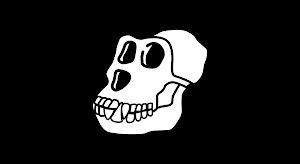

In [10]:
# Let's take a look at the collection's icon
from IPython.display import display

display(api.cdn.query(bayc[0].image_url).image())

In [11]:
# Now let's take a look at the first 500 NFTs in the Bored Ape collection

nfts = api.nft.nfts_by_contract_address(bayc_contract_address, limit=500)
print("{} nfts retrieved\n".format(len(nfts)))
nfts[0].to_dict()

500 nfts retrieved



{'contract_address': '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D',
 'token_id': 0,
 'name': None,
 'description': None,
 'minted_timestamp': '2021-04-22T23:13:40Z',
 'supply': 1,
 'approved_address': None,
 'image_url': 'https://cdn.transpose.io/nft/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/0/image.png',
 'media_url': None,
 'external_url': None,
 'properties': [{'trait_type': 'Earring', 'value': 'Silver Hoop'},
  {'trait_type': 'Background', 'value': 'Orange'},
  {'trait_type': 'Fur', 'value': 'Robot'},
  {'trait_type': 'Clothes', 'value': 'Striped Tee'},
  {'trait_type': 'Mouth', 'value': 'Discomfort'},
  {'trait_type': 'Eyes', 'value': 'X Eyes'}],
 'metadata_url': 'https://cdn.transpose.io/nft/0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D/0/metadata.json',
 'last_refreshed': '2022-05-27T21:24:18Z'}

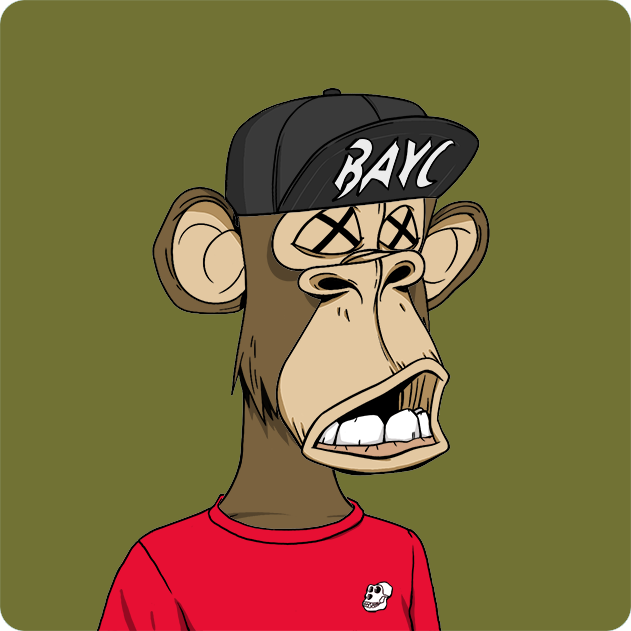

In [12]:
img = api.cdn.query(nfts[5].image_url).image()
display(img)

## Wallet

In [13]:
# Here's how we pull a wallet's nft balance

wallet = '0x3f4C85754A36Cb81067a0A88Bb1f83B9Cef97a91'
ens_address = "0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85"

all_nfts = api.nft.nfts_by_owner(wallet, limit=50)
nfts = api.nft.nfts_by_owner(wallet, ens_address, limit=50)


print("{} nfts retrieved".format(len(all_nfts)))
print("{} nfts retrieved when including only ENS NFTs".format(len(nfts)))

18 nfts retrieved
10 nfts retrieved when including only ENS NFTs


In [14]:
nfts[1].to_dict()
api.nft.collections_by_contract_address(['0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85'])[0].to_dict()

{'contract_address': '0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85',
 'name': 'ENS',
 'symbol': 'ENS',
 'description': 'Ethereum Name Service (ENS) domains are secure domain names for the decentralized world. ENS domains provide a way for users to map human readable names to blockchain and non-blockchain resources, like Ethereum addresses, IPFS hashes, or website URLs. ENS domains can be bought and sold on secondary markets.',
 'created_timestamp': '2020-01-30T00:47:51Z',
 'standard': 'ERC-721',
 'count': 1471996,
 'external_url': 'https://ens.domains',
 'image_url': 'https://cdn.transpose.io/collection/0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85/image.png',
 'twitter_username': 'ensdomains',
 'telegram_url': None,
 'discord_url': None,
 'is_nsfw': False,
 'opensea_slug': 'ens',
 'opensea_url': 'https://opensea.io/collection/ens',
 'last_refreshed': '2022-06-19T04:49:04Z'}

In [15]:
# Token data is accessible the same way
tokens = api.token.tokens_by_owner(wallet)
len(tokens)

1

### Full support ERC-1155 Semi Fungible tokens

Often used in gaming applications, these tokens include a balance.

In [16]:
genesis_888 = '0x36d30B3b85255473D27dd0F7fD8F35e36a9d6F06'

owners = api.nft.owners_by_contract_address(genesis_888, limit=500)
owners[0].to_dict()

{'contract_address': '0x36d30B3b85255473D27dd0F7fD8F35e36a9d6F06',
 'token_id': 888,
 'owner': '0x000000000000000000000000000000000000dEaD',
 'balance': 2797}

### All of a wallet's transfers are easily available

In [17]:
# Pulling the wallet's activity is just as easy

api.nft.transfers_by_account(wallet)[:3]
api.nft.transfers_by_contract_address(genesis_888)

[<NFTTransferObject:  transaction_hash="0x066ac2d5627d37903a4955d56ab35f30b40fc7c4ba8f3cc10b65c4ee1f03164b"  from="None"  to="0x3660f30b87D19A30974Db4FE527E45Fe57a70Dea"  contract_address="0x36d30B3b85255473D27dd0F7fD8F35e36a9d6F06"  token_id="888">,
 <NFTTransferObject:  transaction_hash="0x1d17ac3e3c51df75fd8343f9d8697c55c28f7e64b44c5644715274c7f6564b69"  from="None"  to="0xB16C4d7861C7F386eCAC5e391D5437186809E84f"  contract_address="0x36d30B3b85255473D27dd0F7fD8F35e36a9d6F06"  token_id="888">,
 <NFTTransferObject:  transaction_hash="0x32796075c9378d43ddc964d1f3649c0b1d684837aa4808591e9b74e7547d2aec"  from="None"  to="0xB16C4d7861C7F386eCAC5e391D5437186809E84f"  contract_address="0x36d30B3b85255473D27dd0F7fD8F35e36a9d6F06"  token_id="888">,
 <NFTTransferObject:  transaction_hash="0xe9072638b428126a620525ccc03566229320b85a55aaa2384f66154ca542a474"  from="None"  to="0x407426F1429B6AdEF4D3f4AdD2bfD7093dc53b25"  contract_address="0x36d30B3b85255473D27dd0F7fD8F35e36a9d6F06"  token_id="888

In [18]:
api.nft.transfers_by_account(wallet, limit=1)[0].to_dict()

{'contract_address': '0x1347A97789cd3Aa0b11433E8117F55Ab640A0451',
 'token_id': 9144,
 'block_number': 14161759,
 'log_index': 51,
 'transaction_hash': '0xa285cca338139c0d2fdc08ee368c4be313a64eb4efa3fb7ee0ce7ba410cfe636',
 'timestamp': '2022-02-07T22:45:37Z',
 'category': 'send',
 'operator': None,
 'from': '0xF3F97c46F91223cFC5d727b69a78Ef0D7099e9B1',
 'to': '0x3f4C85754A36Cb81067a0A88Bb1f83B9Cef97a91',
 'quantity': 1}

### Mints are pulled the same way

In [19]:
api.nft.transfers_by_account(wallet, transfer_category='mint', limit=1)[0].to_dict()

{'contract_address': '0x8E7D9F344C525A4B161BC1959fd217eb34ECD010',
 'token_id': 39,
 'block_number': 14303054,
 'log_index': 112,
 'transaction_hash': '0x47adeba317639dccb253221d7116faa74dbee8ee5b17afa73599558552eebd98',
 'timestamp': '2022-03-01T19:41:10Z',
 'category': 'mint',
 'operator': None,
 'from': None,
 'to': '0x3f4C85754A36Cb81067a0A88Bb1f83B9Cef97a91',
 'quantity': 1}

### Charting recent mints

In [20]:
import pandas as pd
from IPython.display import Image
from transpose.extras import Plot
import time

t0 = time.time()
crypto_kitties_address = '0x06012c8cf97BEaD5deAe237070F9587f8E7A266d'

bulk_transfers = api.bulk_request(api.nft.transfers_by_token_id(crypto_kitties_address, transfer_category='mint', limit=500, order='desc'), 20, 1000)
print("{} mints retrieved".format(len(bulk_transfers)))

# Aggregate by day
counts = {}
for transfer in bulk_transfers:
    if transfer.timestamp[:10] in counts.keys():
        counts[transfer.timestamp[:10]] += 1
    else:
        counts[transfer.timestamp[:10]] = 1
counts_list = [counts[x] for x in counts.keys()]
x = pd.date_range(bulk_transfers[0].timestamp, bulk_transfers[-1].timestamp, periods=len(counts_list))

# Set up chart
chart = Plot(title="Last 5000 mints")    
chart.add_data({
    'x': x,
    'y': counts_list,
    'y_axis': "Number of mints",
    'x_axis': "Time"
})

print("Took {}s".format(str(time.time() - t0)))
chart.render(path='/Users/mcalvey/Documents/transpose/code.nosync/live-demo/img/transfers.png', format='png')
Image(filename='/Users/mcalvey/Documents/transpose/code.nosync/live-demo/img/transfers.png')

TransposeBadRequest: 400 Bad Request: Invalid value for contract_address: None

## Fungible Tokens

### Let's dive into WETH

In [ ]:
# Let's pull top weth holders
weth_address = "0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2"
top_holders = api.token.owners_by_contract_address(weth_address, limit=500)
balances = [x.balance for x in top_holders]
print("{} balances found".format(len(balances)))

In [ ]:
# How does this distribution look?
chart = Plot(title="WETH top 500 holder distribution")
chart.add_data({
    'x': list(range(len(balances))),
    'y': balances,
    'y_axis': 'Balance',
    'x_axis': 'Holder'
})
chart.render(path='/Users/mcalvey/Documents/transpose/code.nosync/live-demo/img/transfers.png', format='png')
Image(filename='/Users/mcalvey/Documents/transpose/code.nosync/live-demo/img/transfers.png')

In [ ]:
# Let's graph it
import datetime
import pandas as pd
from IPython.display import Image
from transpose.extras import Plot

# Get data
month_ago = datetime.datetime.now() - datetime.timedelta(days=31)
bulk_transfers = api.bulk_request(api.token.transfers_by_contract_address(weth_address, transferred_after=month_ago, limit=500), 20, 10000)

# Aggregate by day
counts = {}
for transfer in bulk_transfers:
    if transfer.timestamp[:10] in counts.keys():
        counts[transfer.timestamp[:10]] += 1
    else:
        counts[transfer.timestamp[:10]] = 1
counts_list = [counts[x] for x in counts.keys()]
x = pd.date_range(bulk_transfers[0].timestamp, bulk_transfers[-1].timestamp, periods=len(counts_list))

print(len(counts))
for i in counts.keys():
    print(i)
    print(counts[i])
    break
    
# Set up chart
chart = Plot(title="Last 10000 transfers")    
chart.add_data({
    'x': x,
    'y': counts_list,
    'y_axis': "Number of trades",
    'x_axis': "Time"
})

chart.render(path='/Users/mcalvey/Documents/transpose/code.nosync/live-demo/img/transfers.png', format='png')
Image(filename='/Users/mcalvey/Documents/transpose/code.nosync/live-demo/img/transfers.png')

## Extras

### Bored Ape Holder Analysis

In [ ]:
import time
# Time to dive deeper into holder data

# Get all holders of the NFT
t0 = time.time()
all_holders = api.bulk_request(api.nft.owners_by_contract_address(contract_address=bayc_contract_address, limit=500), 20, 10000)
t1 = time.time()
print("Took: {}".format(t1 - t0))
print("Total holders: " + str(len(all_holders)))

In [ ]:
# calculate how many BAYC tokens are held by each holder

number_owned_per_holder = {}
for holder in all_holders:
    if holder.owner in number_owned_per_holder: number_owned_per_holder[holder.owner] += 1
    else: number_owned_per_holder[holder.owner] = 1
sorted_holders = sorted(number_owned_per_holder.items(), key=lambda x: x[1], reverse=True)

top_holder = sorted_holders[0][0]
sorted_holders[:10]

In [ ]:
# Let's add ENS names
named_holders = {}
for holder in sorted_holders[:5]:
    name = api.ens.primary_ens_records_by_account(holder[0])
    if name != []:
        named_holders[name[0].ens_name] = holder[1]
    else:
        named_holders[holder[0]] = holder[1]
named_holders

In [ ]:
# Let's dive into what else the top 10 holders own

top_holders = sorted_holders[:5]
top_overlapping_contracts = {}

for holder in top_holders:
    print("Checking account address: " + holder[0])
    # get all the nfts owned by the holder
    all_nfts_owned = api.bulk_request(api.nft.nfts_by_owner(holder[0], limit=500))

    # get the contract address for each NFT and save the number of NFTs owned by each holder
    for nft in all_nfts_owned:
        if nft.contract_address in top_overlapping_contracts: top_overlapping_contracts[nft.contract_address] += 1
        else: top_overlapping_contracts[nft.contract_address] = 1

sorted_contract_addresses = sorted(top_overlapping_contracts.items(), key=lambda x: x[1], reverse=True)
sorted_contract_addresses[:10]

named_contracts = {}
for contract_address in sorted_contract_addresses[:10]:
    name = api.nft.collections_by_contract_address(contract_address[0])[0].name
    named_contracts[name] = contract_address[1]
named_contracts
